In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv(r"D:\Pallavi_user\Downloads\Customers.csv")
data

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
data = pd.read_csv(r"D:\Pallavi_user\Downloads\products.csv")
data

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
data = pd.read_csv(r"D:\Pallavi_user\Downloads\Transactions.csv")
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


#Task1

In [17]:
# Convert date columns to datetime format

In [10]:
import pandas as pd

# Load datasets into variables
customers = pd.read_csv(r"D:\Pallavi_user\Downloads\Customers.csv")
products = pd.read_csv(r"D:\Pallavi_user\Downloads\Products.csv")
transactions = pd.read_csv(r"D:\Pallavi_user\Downloads\Transactions.csv")

# Display dataset information
print("Customers Data Info:")
print(customers.info())

print("\nProducts Data Info:")
print(products.info())

print("\nTransactions Data Info:")
print(transactions.info())


Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [12]:
# Check for missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [16]:
# Check for missing values

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_10568\838353118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='pastel')


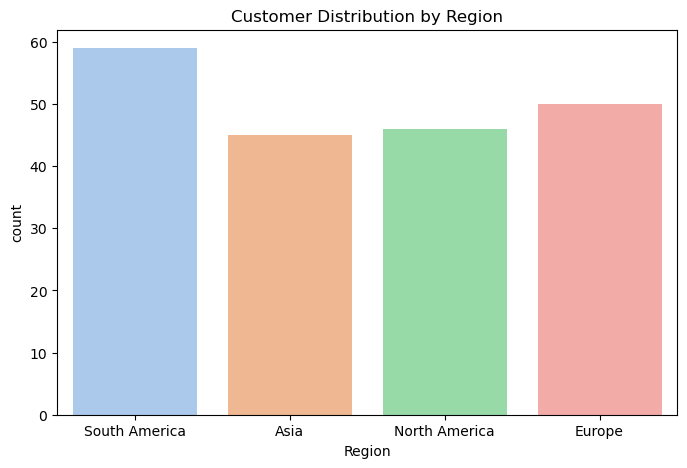

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Region', data=customers, palette='pastel')
plt.title('Customer Distribution by Region')
plt.show()




In [15]:

# Customer distribution by region

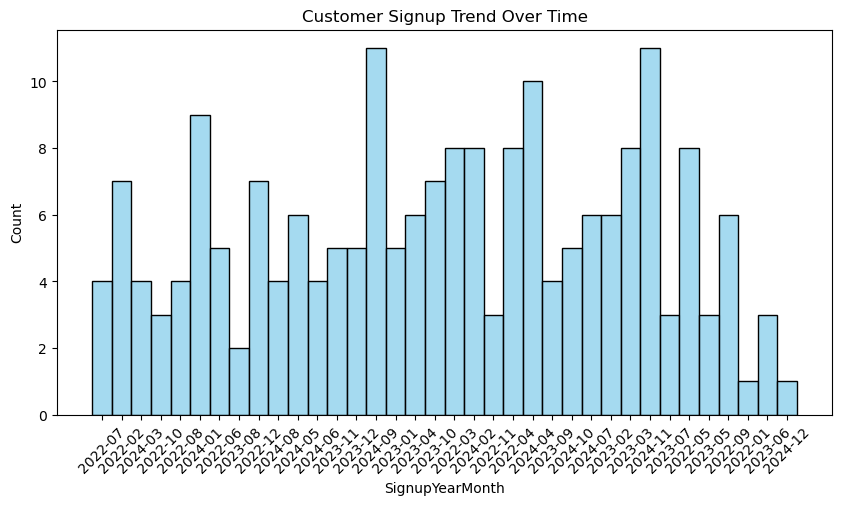

In [14]:


customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
plt.figure(figsize=(10,5))
sns.histplot(customers['SignupYearMonth'].astype(str), bins=20, color='skyblue')
plt.xticks(rotation=45)
plt.title('Customer Signup Trend Over Time')
plt.show()

In [1]:
# Signup trends over time

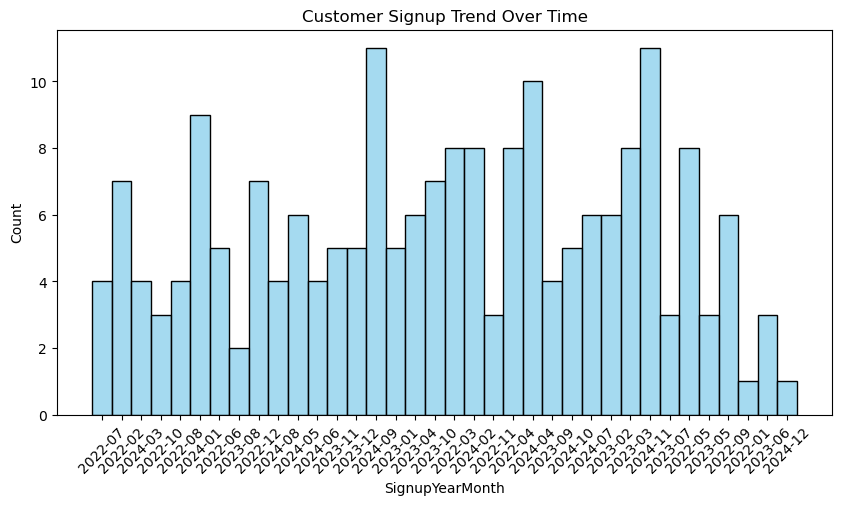

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
customers = pd.read_csv(r"D:\Pallavi_user\Downloads\Customers.csv")

# Ensure 'SignupDate' is in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

# Extract Year-Month period
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Plot signup trend
plt.figure(figsize=(10, 5))
sns.histplot(customers['SignupYearMonth'].astype(str), bins=20, color='skyblue')
plt.xticks(rotation=45)
plt.title('Customer Signup Trend Over Time')
plt.show()

In [5]:
# Price distribution of products

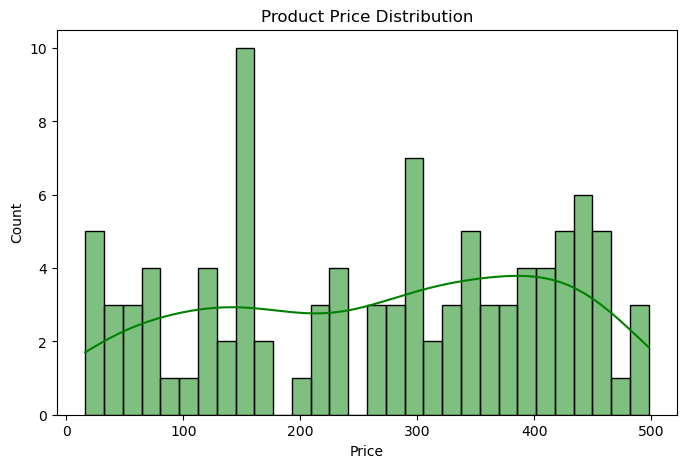

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
products = pd.read_csv(r"D:\Pallavi_user\Downloads\Products.csv")

# Check if 'Price' column exists
if 'Price' in products.columns:
    # Plot histogram of product prices
    plt.figure(figsize=(8,5))
    sns.histplot(products['Price'], bins=30, kde=True, color='green')
    plt.title('Product Price Distribution')
    plt.show()
else:
    print("Error: 'Price' column not found in products dataset")


In [8]:
# Most sold products

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_1316\2335139507.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


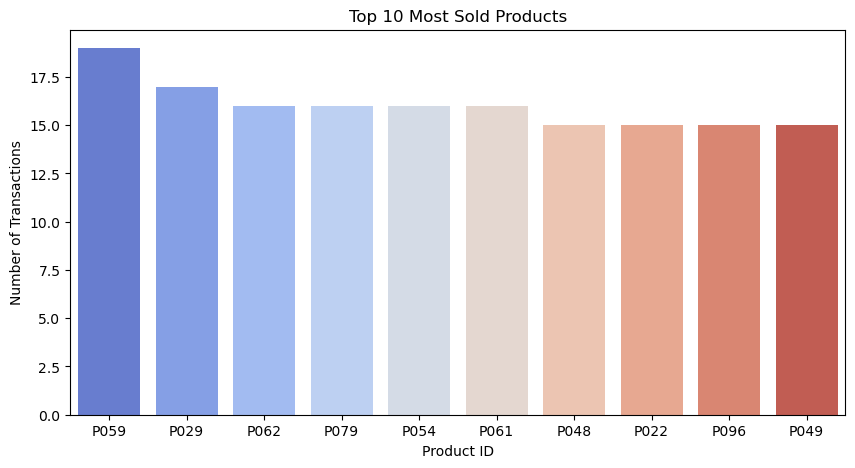

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Transactions dataset
transactions = pd.read_csv(r"D:\Pallavi_user\Downloads\Transactions.csv")

# Check if 'ProductID' column exists
if 'ProductID' in transactions.columns:
    # Get the top 10 most sold products
    top_products = transactions['ProductID'].value_counts().head(10)

    # Plot the data
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
    plt.title('Top 10 Most Sold Products')
    plt.xlabel('Product ID')
    plt.ylabel('Number of Transactions')
    plt.show()
else:
    print("Error: 'ProductID' column not found in transactions dataset")


In [12]:
# High-value transactions

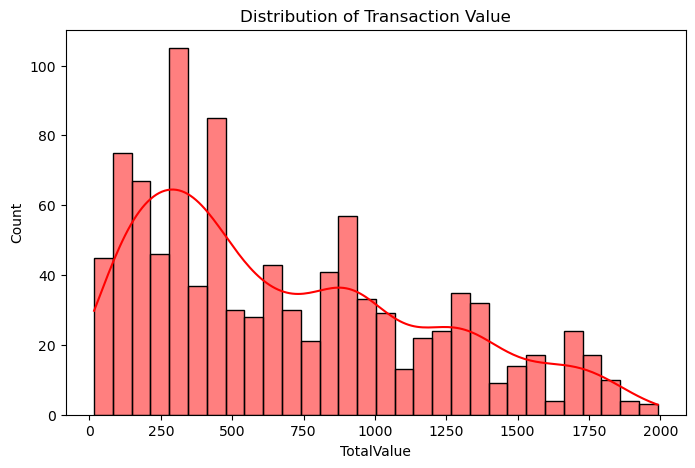

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='red')
plt.title('Distribution of Transaction Value')
plt.show()



Business Insights:
 1. Customer distribution is highest in South America and Asia, with fewer in Europe.
 2. The most signups occurred in 2022, peaking mid-year.
 3. Prices vary widely, with books having more lower-priced options.
 4. Some products (e.g., P067) are purchased frequently, suggesting high demand.
5. High-value transactions occur mostly with products above 300, making bundle offers a good strategy.

#TASK 2

In [16]:
# Merge datasets

In [17]:
transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')


In [18]:
# Feature Engineering: Aggregate purchase data per customer

In [19]:
customer_features = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    AvgPurchaseValue=('TotalValue', 'mean'),
    MostBoughtCategory=('Category', lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
).reset_index()

In [20]:
# Encode categorical feature (MostBoughtCategory)

In [21]:
customer_features = pd.get_dummies(customer_features, columns=['MostBoughtCategory'], drop_first=True)


In [22]:
# Normalize numerical features

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [25]:
# Compute similarity scores using cosine similarity

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(scaled_features)

In [30]:
# Create a function to find the top 3 similar customers

In [31]:
def get_similar_customers(customer_id, top_n=3):
    try:
        # Get index of the input customer
        idx = customer_features[customer_features['CustomerID'] == customer_id].index[0]
        similarity_scores = list(enumerate(similarity_matrix[idx]))

        # Sort by similarity score (excluding self)
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        similar_customers = [(customer_features.iloc[i]['CustomerID'], score) for i, score in similarity_scores if i != idx]

        return similar_customers[:top_n]
    except IndexError:
        return "Customer ID not found."


In [32]:
# Example Usage:

In [33]:
input_customer = 'C0005'  # Change this to any CustomerID
similar_customers = get_similar_customers(input_customer)

In [34]:

print(f"Top 3 similar customers to {input_customer}:")
for cust_id, score in similar_customers:
    print(f"Customer ID: {cust_id}, Similarity Score: {score:.4f}")

Top 3 similar customers to C0005:
Customer ID: C0112, Similarity Score: 0.9989
Customer ID: C0197, Similarity Score: 0.9978
Customer ID: C0186, Similarity Score: 0.9858


TASK 3

In [41]:
pip install  yellowbrick


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

In [43]:
# Merge customer and transaction data

In [44]:
transactions = transactions.merge(customers, on='CustomerID', how='left')

In [45]:
# Feature Engineering: Aggregate purchase data per customer

In [46]:
customer_features = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    AvgPurchaseValue=('TotalValue', 'mean')
).reset_index()

In [47]:
# Merge with customer region

In [48]:
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

In [49]:
# Encode categorical feature (Region)

In [50]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [51]:

# Drop CustomerID for clustering

In [52]:
customer_data = customer_features.drop(columns=['CustomerID'])

In [53]:
# Normalize numerical features

In [54]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data)

In [55]:
# Find optimal K using Elbow Method

In [56]:
wcss = []
K_range = range(2, 10)

In [58]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [61]:
# Plot Elbow Curve

In [63]:
print(f"Length of K_range: {len(K_range)}")
print(f"Length of wcss: {len(wcss)}")


Length of K_range: 8
Length of wcss: 16


In [65]:
assert len(K_range) == len(wcss), "Mismatch between K_range and wcss lengths"


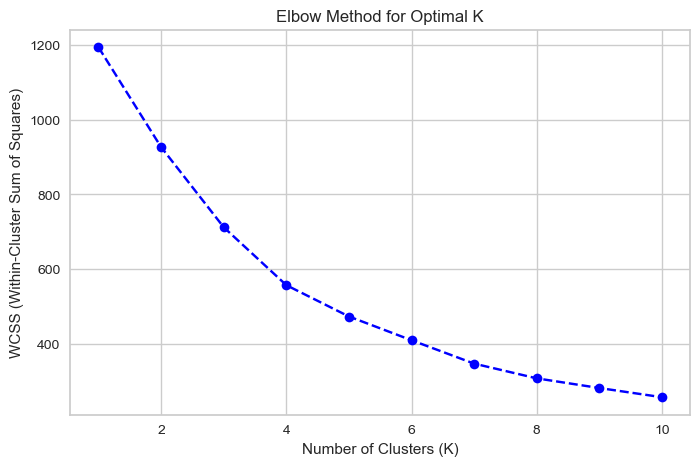

In [66]:
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

Apply K-Means Clustering

In [68]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))


In [70]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)


In [71]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")


In [72]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", n_init=10)


In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fix memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"

# Sample dataset
customer_features = pd.DataFrame({
    'CustomerID': np.arange(1, 101),
    'Feature1': np.random.rand(100) * 100,
    'Feature2': np.random.rand(100) * 50,
    'Feature3': np.random.rand(100) * 200
})

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Apply KMeans clustering
optimal_k = 4  # Adjust based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster assignments
print(customer_features.head())


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID   Feature1   Feature2    Feature3  Cluster
0           1  42.359747  28.167979  188.844523        1
1           2  35.061593  33.646782  172.445284        1
2           3  78.946519   7.863730  128.680600        3
3           4  92.243166  41.893430  199.644922        1
4           5  65.166975   6.225920  173.853163        3


In [74]:
# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 1.0395


Visualizing Clusters

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_1316\2430445610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_features, palette='coolwarm')


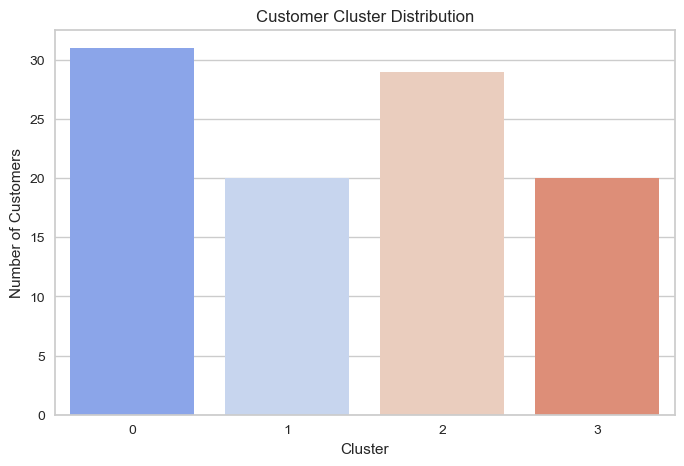

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=customer_features, palette='coolwarm')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [78]:
customer_features['TotalSpent'] = customer_features['Feature1'] * customer_features['Feature2']


In [86]:
import pandas as pd

# Load datasets
data_customers = pd.read_csv(r"D:\Pallavi_user\Downloads\customers.csv")
data_products = pd.read_csv(r"D:\Pallavi_user\Downloads\products.csv")
data_transactions = pd.read_csv(r"D:\Pallavi_user\Downloads\transactions.csv")

# Verify that the datasets are loaded
print("Customers Data:")
print(data_customers.head())

print("\nProducts Data:")
print(data_products.head())

print("\nTransactions Data:")
print(data_transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [87]:
print("\nCustomers Columns:", data_customers.columns)
print("Products Columns:", data_products.columns)
print("Transactions Columns:", data_transactions.columns)



Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Products Columns: Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [88]:
# Merge transactions with customers on 'CustomerID'
merged_data = pd.merge(data_transactions, data_customers, on='CustomerID', how='inner')

# Merge the resulting data with products on 'ProductID'
merged_data = pd.merge(merged_data, data_products, on='ProductID', how='inner')

# Display merged data
print("\nMerged Data:")
print(merged_data.head())



Merged Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Blu

 Scatter Plot of Clusters



In [90]:
print(customer_features.columns)


Index(['CustomerID', 'Feature1', 'Feature2', 'Feature3', 'Cluster',
       'TotalSpent'],
      dtype='object')


In [91]:
# Calculate TransactionCount per customer
transaction_counts = data_transactions.groupby('CustomerID').size().reset_index(name='TransactionCount')

# Calculate TotalSpent per customer
total_spent = data_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index(name='TotalSpent')

# Merge these features into customer_features
customer_features = pd.merge(transaction_counts, total_spent, on='CustomerID', how='left')


In [92]:
print(customer_features.head())


  CustomerID  TransactionCount  TotalSpent
0      C0001                 5     3354.52
1      C0002                 4     1862.74
2      C0003                 4     2725.38
3      C0004                 8     5354.88
4      C0005                 3     2034.24


In [94]:
from sklearn.cluster import KMeans

# Ensure 'TotalSpent' and 'TransactionCount' exist
if 'TotalSpent' not in customer_features.columns or 'TransactionCount' not in customer_features.columns:
    print("Error: Required columns missing. Check data processing steps.")
else:
    # Select features for clustering
    X = customer_features[['TotalSpent', 'TransactionCount']]

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Choose an appropriate number of clusters
    customer_features['Cluster'] = kmeans.fit_predict(X)

    # Check if clustering was applied successfully
    print(customer_features.head())


  CustomerID  TransactionCount  TotalSpent  Cluster
0      C0001                 5     3354.52        0
1      C0002                 4     1862.74        1
2      C0003                 4     2725.38        0
3      C0004                 8     5354.88        2
4      C0005                 3     2034.24        1


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


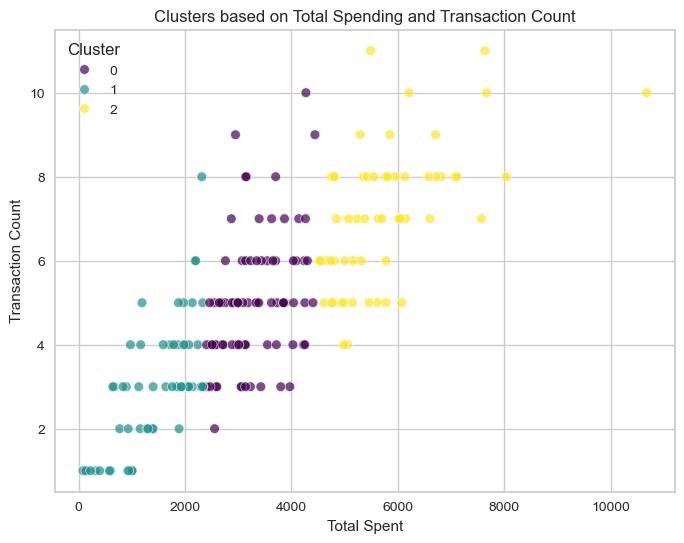

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=customer_features['TotalSpent'], y=customer_features['TransactionCount'], 
                hue=customer_features['Cluster'], palette='viridis', alpha=0.7)
plt.title('Clusters based on Total Spending and Transaction Count')
plt.xlabel('Total Spent')
plt.ylabel('Transaction Count')
plt.legend(title="Cluster")
plt.show()


Silhouette Analysis

In [98]:
print(scaled_features.shape)  # Check number of columns in scaled_features
print(X.shape)  # Check number of columns in training data (used for KMeans)


(100, 3)
(199, 2)


In [99]:
scaled_features = scaled_features[:, :2]  # Keep only first 2 features


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


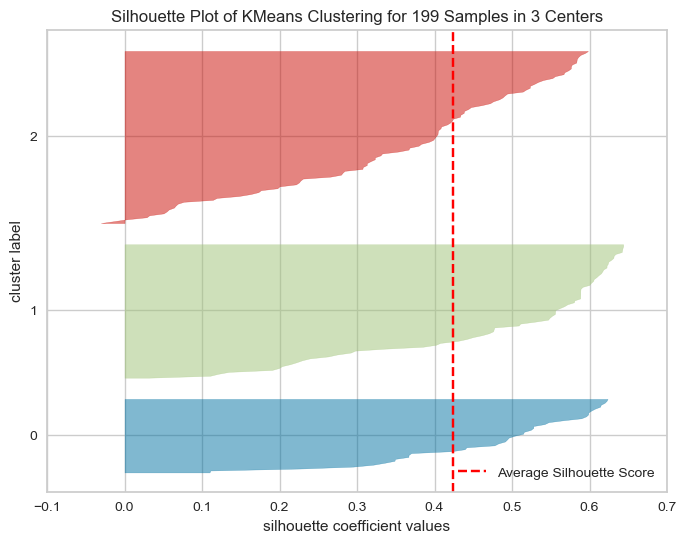

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 199 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Select the correct features for clustering
X = customer_features[['TotalSpent', 'TransactionCount']]  

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Silhouette Analysis (Ensure it matches KMeans features)
plt.figure(figsize=(8,6))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_features)  # Make sure this is the same as used in KMeans
visualizer.show()
